In [1]:
pip install --upgrade scikit-learn imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip uninstall scikit-learn imbalanced-learn -y

Found existing installation: scikit-learn 1.4.2
Uninstalling scikit-learn-1.4.2:
  Successfully uninstalled scikit-learn-1.4.2
Found existing installation: imbalanced-learn 0.12.2
Uninstalling imbalanced-learn-0.12.2:
  Successfully uninstalled imbalanced-learn-0.12.2
Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install scikit-learn==1.2.2
!pip install imbalanced-learn==0.10.1

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for scikit-learn==1.2.2 from https://files.pythonhosted.org/packages/db/98/169b46a84b48f92df2b5e163fce75d471f4df933f8b3d925a61133210776/scikit_learn-1.2.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.3 MB 435.7 kB/s eta 0:00:19
   ---------------------------------------- 0.0/8.3 MB 326.8 kB/s eta 0:00:26
   ---------------------------------------- 0.0/8.3 MB 326.8 kB/s eta 0:00:26
   ---------------------------------------- 0.1/8.3 MB 525.1 kB/s eta 0:00:16
    --------------------------------------- 0.1/8.3 MB 602.4 kB/s eta 0:00:14
    --------------------------------------- 0.1/8.3 MB 655.8 kB/s eta 0:00:13
    ------------------

Defaulting to user installation because normal site-packages is not writeable


In [5]:
pip list

Package                       Version
----------------------------- ---------------
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
altair                        5.3.0
anaconda-anon-usage           0.4.2
anaconda-catalogs             0.2.0
anaconda-client               1.12.1
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         22.1.0
Automat  

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import sklearn
import sys

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import ParameterGrid
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import f1_score, fbeta_score, accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import StratifiedKFold

from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.over_sampling import ADASYN, SMOTE

from pandas.api.types import is_numeric_dtype

palette = ["#9b59b6", "#5497db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.set_palette(palette)


In [7]:
# Columns of the dataset (data comes without an header)
columns = ["existing_account", "month_duration", "credit_history",\
           "purpose", "credit_amount", "saving_bonds",\
           "employment_status", "installment_rate", "status_sex", \
           "debts_status", "resident_since", "property", \
           "age", "installment_plans", "housing_status", \
           "credit_number", "job", "people_liability", \
           "telephone", "foreign", "class"]

numerical_attributes = ["month_duration", "credit_amount", "installment_rate", "resident_since", "age",\
                        "credit_number", "people_liability"]

In [10]:
df = pd.read_csv("C:\\Users\\soumi\\Downloads\\german_credit_data.csv", sep=",", header=None, names=columns)

In [11]:
df.head()

,existing_account,month_duration,credit_history,purpose,credit_amount,saving_bonds,employment_status,installment_rate,status_sex,debts_status,...,property,age,installment_plans,housing_status,credit_number,job,people_liability,telephone,foreign,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   existing_account   1000 non-null   object
 1   month_duration     1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   purpose            1000 non-null   object
 4   credit_amount      1000 non-null   int64 
 5   saving_bonds       1000 non-null   object
 6   employment_status  1000 non-null   object
 7   installment_rate   1000 non-null   int64 
 8   status_sex         1000 non-null   object
 9   debts_status       1000 non-null   object
 10  resident_since     1000 non-null   int64 
 11  property           1000 non-null   object
 12  age                1000 non-null   int64 
 13  installment_plans  1000 non-null   object
 14  housing_status     1000 non-null   object
 15  credit_number      1000 non-null   int64 
 16  job                1000 non-null   object
 

In [13]:
df.describe()

,month_duration,credit_amount,installment_rate,resident_since,age,credit_number,people_liability,class
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [31]:
# Positive labels
eligible= df["class"] == 1
print(f"The proportion of individuals which are eligible for credit (good risk) is: {df[eligible].shape[0]/df.shape[0]}")

# Negative labels
not_eligible= df["class"] == 2
print(f"The proportion of individuals which are not eligible for credit (bad risk) is: {df[not_eligible].shape[0]/df.shape[0]}")

# We can note a sligthly umbalance

The proportion of individuals which are eligible for credit (good risk) is: 0.7
The proportion of individuals which are not eligible for credit (bad risk) is: 0.3


In [32]:
df_numerical = df.copy()

dummy_columns = ["credit_history", "purpose", "status_sex", "debts_status", "property", "installment_plans", "housing_status", \
            "foreign", "existing_account", "saving_bonds", "telephone", "job", "employment_status"]

df_numerical = pd.get_dummies(df_numerical, columns=dummy_columns, drop_first=True)

In [33]:
df_numerical.head()

,month_duration,credit_amount,installment_rate,resident_since,age,credit_number,people_liability,class,credit_history_A31,credit_history_A32,...,saving_bonds_A64,saving_bonds_A65,telephone_A192,job_A172,job_A173,job_A174,employment_status_A72,employment_status_A73,employment_status_A74,employment_status_A75
0,6,1169,4,4,67,2,1,1,False,False,...,False,True,True,False,True,False,False,False,False,True
1,48,5951,2,2,22,1,1,2,False,True,...,False,False,False,False,True,False,False,True,False,False
2,12,2096,2,3,49,1,2,1,False,False,...,False,False,False,True,False,False,False,False,True,False
3,42,7882,2,4,45,1,2,1,False,True,...,False,False,False,False,True,False,False,False,True,False
4,24,4870,3,4,53,2,2,2,False,False,...,False,False,False,False,True,False,False,True,False,False


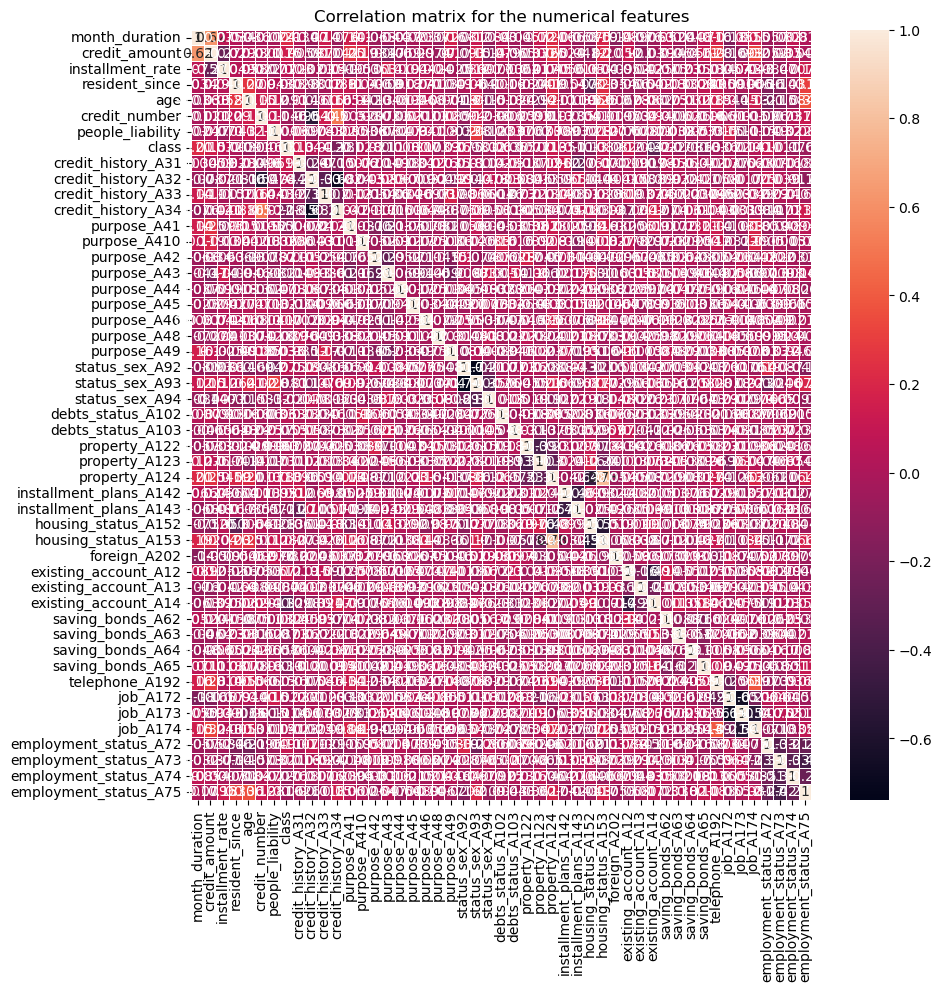

In [35]:
df_numerical = df.copy()

# List of categorical columns to be converted to dummy variables
dummy_columns = [
    "credit_history", "purpose", "status_sex", "debts_status", "property",
    "installment_plans", "housing_status", "foreign", "existing_account",
    "saving_bonds", "telephone", "job", "employment_status"
]

# Convert categorical columns to dummy variables
df_numerical = pd.get_dummies(df_numerical, columns=dummy_columns, drop_first=True)

# Ensure all columns are numeric
df_numerical = df_numerical.apply(pd.to_numeric, errors='coerce')

# Drop any columns that could not be converted to numeric
df_numerical = df_numerical.dropna(axis=1, how='any')

# Compute the correlation matrix
corr = df_numerical.corr()

# Plot the heatmap
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr, annot=True, linewidths=0.5, xticklabels=corr.columns, yticklabels=corr.columns)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.set_title("Correlation matrix for the numerical features")
plt.show()

In [38]:
corr_unstacked = corr.unstack().abs()
ranked_corr = corr_unstacked.sort_values(kind="quicksort", ascending=False)
ranked_corr = ranked_corr[ranked_corr != 1]

ranked_corr.head(10)

property_A124        housing_status_A153    0.779853
housing_status_A153  property_A124          0.779853
status_sex_A92       status_sex_A93         0.738036
status_sex_A93       status_sex_A92         0.738036
credit_history_A34   credit_history_A32     0.683617
credit_history_A32   credit_history_A34     0.683617
job_A173             job_A172               0.652438
job_A172             job_A173               0.652438
month_duration       credit_amount          0.624984
credit_amount        month_duration         0.624984
dtype: float64

C:\ProgramData\Application Data\anaconda 123\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.08, 'Pairplots for the numberical variables')

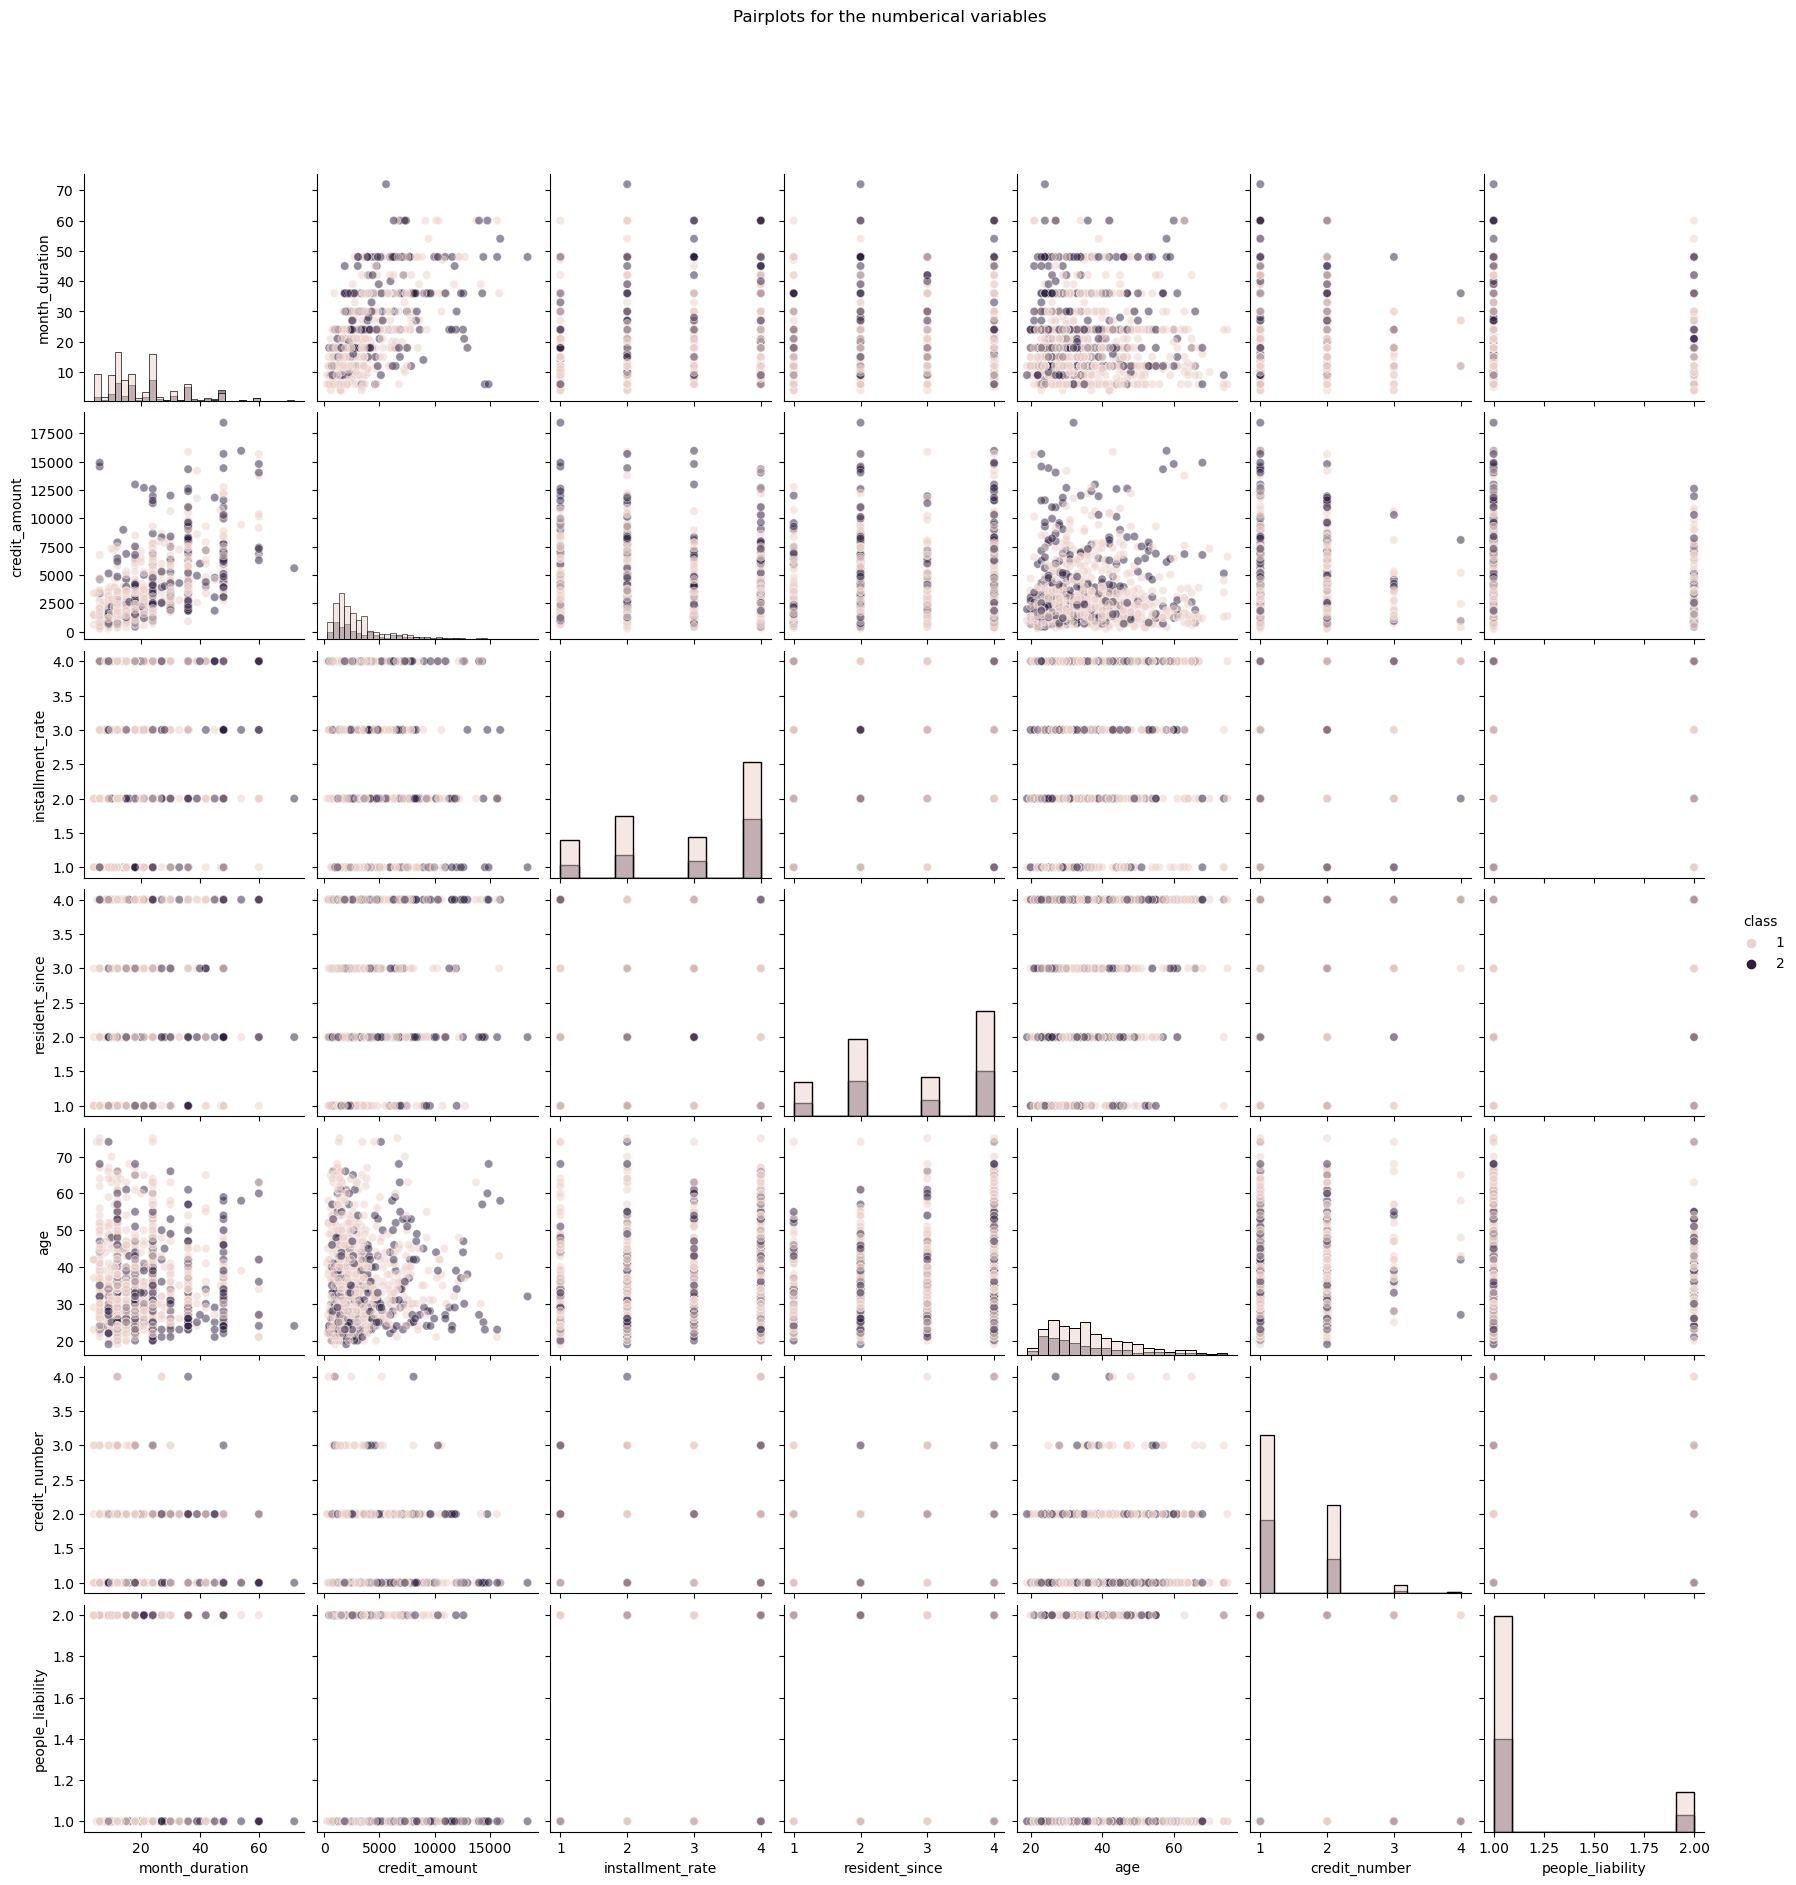

In [39]:
pairplot_df = df.loc[:, numerical_attributes + ["class"]].replace({"result": {1:"good", 2:"bad"}})
ax = sns.pairplot(pairplot_df, hue="class", plot_kws={"alpha":0.5}, diag_kind="hist")
ax.fig.suptitle("Pairplots for the numberical variables", y=1.08)

In [40]:
# Utility function that given the dataset prints a table pivoted for two values of interest with the counts of each one
def entries_per_couple_variables(df, first_var, second_var, first_level_indexes=None, second_level_indexes=None):
    # perform the renaming on the column values
    renamed_df = df.loc[:,[first_var, second_var]]
    if first_level_indexes is not None and second_level_indexes is not None:
        renamed_df = renamed_df.replace({first_var:first_level_indexes, second_var:second_level_indexes})
    # group for the two columns
    grouped_df = renamed_df.groupby([first_var, second_var]).size().reset_index()
    
    # pivot the result

    pivoted_df = pd.pivot_table(grouped_df, index=first_var, columns=second_var, values=0)
    pivoted_df["Total Column Sum"] = pivoted_df.sum(axis=1)
    for index in second_level_indexes.values():
        pivoted_df[f"proportion_{index}"] = pivoted_df[index]/pivoted_df["Total Column Sum"]
    
    df_total_rows = pivoted_df.sum(axis=0)
    df_total_rows = df_total_rows.rename("Total Row Sum")
    
    
    pivoted_df = pivoted_df.append(df_total_rows)
    for index in first_level_indexes.values():
        prop_df = pivoted_df.loc[index]/df_total_rows
        prop_df = prop_df.rename(f"proportion_{index}")
        prop_df[len(second_level_indexes):] = "-"
        pivoted_df = pivoted_df.append(prop_df)
            
    df_total_rows[len(second_level_indexes)+1:] = "-"
    pivoted_df.loc["Total Row Sum"] = df_total_rows
    
    return pivoted_df

In [44]:
import pandas as pd

def entries_per_couple_variables(df, first_var, second_var, first_level_indexes=None, second_level_indexes=None):
    # Perform the renaming on the column values
    renamed_df = df.loc[:, [first_var, second_var]]
    if first_level_indexes is not None and second_level_indexes is not None:
        renamed_df = renamed_df.replace({first_var: first_level_indexes, second_var: second_level_indexes})
    
    # Group by the two columns
    grouped_df = renamed_df.groupby([first_var, second_var]).size().reset_index(name='count')
    
    # Pivot the result
    pivoted_df = pd.pivot_table(grouped_df, index=first_var, columns=second_var, values='count', fill_value=0)
    
    # Calculate total column sum and proportions
    pivoted_df["Total Column Sum"] = pivoted_df.sum(axis=1)
    for index in second_level_indexes.values():
        pivoted_df[f"proportion_{index}"] = pivoted_df[index] / pivoted_df["Total Column Sum"]
    
    # Calculate total row sum
    df_total_rows = pivoted_df.sum(axis=0)
    df_total_rows.name = "Total Row Sum"
    
    # Append total row sum to the pivoted_df
    pivoted_df = pd.concat([pivoted_df, df_total_rows.to_frame().T])
    
    # Calculate and append proportions for each level
    for index in first_level_indexes.values():
        prop_df = pivoted_df.loc[index] / df_total_rows
        prop_df.name = f"proportion_{index}"
        prop_df[len(second_level_indexes):] = "-"
        pivoted_df = pd.concat([pivoted_df, prop_df.to_frame().T])
    
    # Set the total row sum proportions to "-"
    df_total_rows[len(second_level_indexes) + 1:] = "-"
    pivoted_df.loc["Total Row Sum"] = df_total_rows
    
    return pivoted_df

# Example usage
saving_bonds_level_indexes = {
    "A61": "A61: < 100DM",
    "A62": "A62: 100 DM<=...< 500DM",
    "A63": "A63: 500 DM <= ... < 1000 DM",
    "A64": "A64: >= 1000 DM",
    "A65": "A65: unknown/ no savings account"
}
second_level_indexes = {1: "good", 2: "bad"}

# Assuming df is your DataFrame
result = entries_per_couple_variables(df, "saving_bonds", "class", saving_bonds_level_indexes, second_level_indexes)
print(result)


class                                             bad      good  \
A61: < 100DM                                    217.0     386.0   
A62: 100 DM<=...< 500DM                          34.0      69.0   
A63: 500 DM <= ... < 1000 DM                     11.0      52.0   
A64: >= 1000 DM                                   6.0      42.0   
A65: unknown/ no savings account                 32.0     151.0   
Total Row Sum                                   300.0     700.0   
proportion_A61: < 100DM                      0.723333  0.551429   
proportion_A62: 100 DM<=...< 500DM           0.113333  0.098571   
proportion_A63: 500 DM <= ... < 1000 DM      0.036667  0.074286   
proportion_A64: >= 1000 DM                       0.02      0.06   
proportion_A65: unknown/ no savings account  0.106667  0.215714   

class                                       Total Column Sum proportion_good  \
A61: < 100DM                                           603.0        0.640133   
A62: 100 DM<=...< 500DM            

In [45]:
saving_bonds_level_indexes = {"A61": "A61: < 100DM",
                       "A62":"A62: 100 DM<=...< 500DM",
                       "A63":"A63: 500 DM <= ... < 1000 DM",
                       "A64":"A64: >= 1000 DM",
                       "A65":"A65: unknown/ no savings account"}
second_level_indexes = {1:"good", 2:"bad"}
entries_per_couple_variables(df, "saving_bonds", "class", saving_bonds_level_indexes, second_level_indexes)

class,bad,good,Total Column Sum,proportion_good,proportion_bad
A61: < 100DM,217.0,386.0,603.0,0.640133,0.359867
A62: 100 DM<=...< 500DM,34.0,69.0,103.0,0.669903,0.330097
A63: 500 DM <= ... < 1000 DM,11.0,52.0,63.0,0.825397,0.174603
A64: >= 1000 DM,6.0,42.0,48.0,0.875,0.125
A65: unknown/ no savings account,32.0,151.0,183.0,0.825137,0.174863
Total Row Sum,300.0,700.0,1000.0,-,-
proportion_A61: < 100DM,0.723333,0.551429,-,-,-
proportion_A62: 100 DM<=...< 500DM,0.113333,0.098571,-,-,-
proportion_A63: 500 DM <= ... < 1000 DM,0.036667,0.074286,-,-,-
proportion_A64: >= 1000 DM,0.02,0.06,-,-,-


In [46]:
existing_account_level_indexes = {"A11": "A11: .. < 0 DM",
                       "A12": "A12: 0 <= ... < 200 DM",
                       "A13": "A13: ... >= 200 DM / salary assignments for at least 1 year",
                       "A14": "A14: no checking account"}

entries_per_couple_variables(df, "existing_account", "class", existing_account_level_indexes, second_level_indexes)

class,bad,good,Total Column Sum,proportion_good,proportion_bad
A11: .. < 0 DM,135.0,139.0,274.0,0.507299,0.492701
A12: 0 <= ... < 200 DM,105.0,164.0,269.0,0.609665,0.390335
A13: ... >= 200 DM / salary assignments for at least 1 year,14.0,49.0,63.0,0.777778,0.222222
A14: no checking account,46.0,348.0,394.0,0.883249,0.116751
Total Row Sum,300.0,700.0,1000.0,-,-
proportion_A11: .. < 0 DM,0.45,0.198571,-,-,-
proportion_A12: 0 <= ... < 200 DM,0.35,0.234286,-,-,-
proportion_A13: ... >= 200 DM / salary assignments for at least 1 year,0.046667,0.07,-,-,-
proportion_A14: no checking account,0.153333,0.497143,-,-,-


In [47]:
entries_per_couple_variables(df, "existing_account", "saving_bonds", existing_account_level_indexes, saving_bonds_level_indexes)

saving_bonds,A61: < 100DM,A62: 100 DM<=...< 500DM,A63: 500 DM <= ... < 1000 DM,A64: >= 1000 DM,A65: unknown/ no savings account,Total Column Sum,proportion_A61: < 100DM,proportion_A62: 100 DM<=...< 500DM,proportion_A63: 500 DM <= ... < 1000 DM,proportion_A64: >= 1000 DM,proportion_A65: unknown/ no savings account
A11: .. < 0 DM,219.0,12.0,8.0,6.0,29.0,274.0,0.79927,0.043796,0.029197,0.021898,0.105839
A12: 0 <= ... < 200 DM,152.0,47.0,11.0,14.0,45.0,269.0,0.565056,0.174721,0.040892,0.052045,0.167286
A13: ... >= 200 DM / salary assignments for at least 1 year,41.0,5.0,4.0,3.0,10.0,63.0,0.650794,0.079365,0.063492,0.047619,0.15873
A14: no checking account,191.0,39.0,40.0,25.0,99.0,394.0,0.484772,0.098985,0.101523,0.063452,0.251269
Total Row Sum,603.0,103.0,63.0,48.0,183.0,1000.0,-,-,-,-,-
proportion_A11: .. < 0 DM,0.363184,0.116505,0.126984,0.125,0.15847,-,-,-,-,-,-
proportion_A12: 0 <= ... < 200 DM,0.252073,0.456311,0.174603,0.291667,0.245902,-,-,-,-,-,-
proportion_A13: ... >= 200 DM / salary assignments for at least 1 year,0.067993,0.048544,0.063492,0.0625,0.054645,-,-,-,-,-,-
proportion_A14: no checking account,0.31675,0.378641,0.634921,0.520833,0.540984,-,-,-,-,-,-


In [49]:
housing_level_indexes = {"A151":"A151: rent",\
                       "A152":"A152: own", \
                       "A153":"A153: for free"}
entries_per_couple_variables(df, "housing_status", "class", housing_level_indexes, second_level_indexes)

class,bad,good,Total Column Sum,proportion_good,proportion_bad
A151: rent,70.0,109.0,179.0,0.608939,0.391061
A152: own,186.0,527.0,713.0,0.73913,0.26087
A153: for free,44.0,64.0,108.0,0.592593,0.407407
Total Row Sum,300.0,700.0,1000.0,-,-
proportion_A151: rent,0.233333,0.155714,-,-,-
proportion_A152: own,0.62,0.752857,-,-,-
proportion_A153: for free,0.146667,0.091429,-,-,-


In [50]:
property_level_indexes = {"A121": "A121: real estate",\
                          "A122": "A122: if not A121 : building society savings agreement/ life insurance",\
                          "A123": "A123: if not A121/A122 : car or other, not in attribute 6",\
                          "A124": "A124: unknown / no property"}

entries_per_couple_variables(df, "housing_status", "property", housing_level_indexes, property_level_indexes)

property,A121: real estate,A122: if not A121 : building society savings agreement/ life insurance,"A123: if not A121/A122 : car or other, not in attribute 6",A124: unknown / no property,Total Column Sum,proportion_A121: real estate,proportion_A122: if not A121 : building society savings agreement/ life insurance,"proportion_A123: if not A121/A122 : car or other, not in attribute 6",proportion_A124: unknown / no property
A151: rent,55.0,46.0,60.0,18.0,179.0,0.307263,0.256983,0.335196,0.100559
A152: own,226.0,184.0,271.0,32.0,713.0,0.316971,0.258065,0.380084,0.044881
A153: for free,1.0,2.0,1.0,104.0,108.0,0.009259,0.018519,0.009259,0.962963
Total Row Sum,282.0,232.0,332.0,154.0,1000.0,-,-,-,-
proportion_A151: rent,0.195035,0.198276,0.180723,0.116883,-,-,-,-,-
proportion_A152: own,0.801418,0.793103,0.816265,0.207792,-,-,-,-,-
proportion_A153: for free,0.003546,0.008621,0.003012,0.675325,-,-,-,-,-


In [51]:
first_level_indexes = {"A91":"A91: male:divorced/separated",\
                       "A92":"A92: female:divorced/separated/married",\
                       "A93":"A93: male:single",\
                       "A94":"A94: male:married/widowed"}
entries_per_couple_variables(df, "status_sex", "class", first_level_indexes, second_level_indexes)

class,bad,good,Total Column Sum,proportion_good,proportion_bad
A91: male:divorced/separated,20.0,30.0,50.0,0.6,0.4
A92: female:divorced/separated/married,109.0,201.0,310.0,0.648387,0.351613
A93: male:single,146.0,402.0,548.0,0.733577,0.266423
A94: male:married/widowed,25.0,67.0,92.0,0.728261,0.271739
Total Row Sum,300.0,700.0,1000.0,-,-
proportion_A91: male:divorced/separated,0.066667,0.042857,-,-,-
proportion_A92: female:divorced/separated/married,0.363333,0.287143,-,-,-
proportion_A93: male:single,0.486667,0.574286,-,-,-
proportion_A94: male:married/widowed,0.083333,0.095714,-,-,-


In [52]:
first_level_indexes = {"A40":"A40: car (new)",\
                       "A41":"A41: car (used)",\
                       "A42":"A42: furniture/equipment",\
                       "A43":"A43: radio/television",\
                       "A44":"A44: domestic appliances",\
                       "A45":"A45: repairs",\
                       "A46":"A46: education",\
                       "A48" : "A48: retraining",\
                       "A49":"A49: business",\
                       "A410" : "A410: others"}
entries_per_couple_variables(df, "purpose", "class", first_level_indexes, second_level_indexes)

class,bad,good,Total Column Sum,proportion_good,proportion_bad
A40: car (new),89.0,145.0,234.0,0.619658,0.380342
A410: others,5.0,7.0,12.0,0.583333,0.416667
A41: car (used),17.0,86.0,103.0,0.834951,0.165049
A42: furniture/equipment,58.0,123.0,181.0,0.679558,0.320442
A43: radio/television,62.0,218.0,280.0,0.778571,0.221429
A44: domestic appliances,4.0,8.0,12.0,0.666667,0.333333
A45: repairs,8.0,14.0,22.0,0.636364,0.363636
A46: education,22.0,28.0,50.0,0.56,0.44
A48: retraining,1.0,8.0,9.0,0.888889,0.111111
A49: business,34.0,63.0,97.0,0.649485,0.350515


In [53]:
job_level_indexes = {"A171": "unemployed/ unskilled - non-resident",\
                     "A172": "A172: unskilled - resident",\
                     "A173": "A173: skilled employee / official",\
                     "A174": "A174: management/ self-employed/highly qualified employee/ officer"}
entries_per_couple_variables(df, "job", "class", job_level_indexes, second_level_indexes)

class,bad,good,Total Column Sum,proportion_good,proportion_bad
A172: unskilled - resident,56.0,144.0,200.0,0.72,0.28
A173: skilled employee / official,186.0,444.0,630.0,0.704762,0.295238
A174: management/ self-employed/highly qualified employee/ officer,51.0,97.0,148.0,0.655405,0.344595
unemployed/ unskilled - non-resident,7.0,15.0,22.0,0.681818,0.318182
Total Row Sum,300.0,700.0,1000.0,-,-
proportion_unemployed/ unskilled - non-resident,0.023333,0.021429,-,-,-
proportion_A172: unskilled - resident,0.186667,0.205714,-,-,-
proportion_A173: skilled employee / official,0.62,0.634286,-,-,-
proportion_A174: management/ self-employed/highly qualified employee/ officer,0.17,0.138571,-,-,-


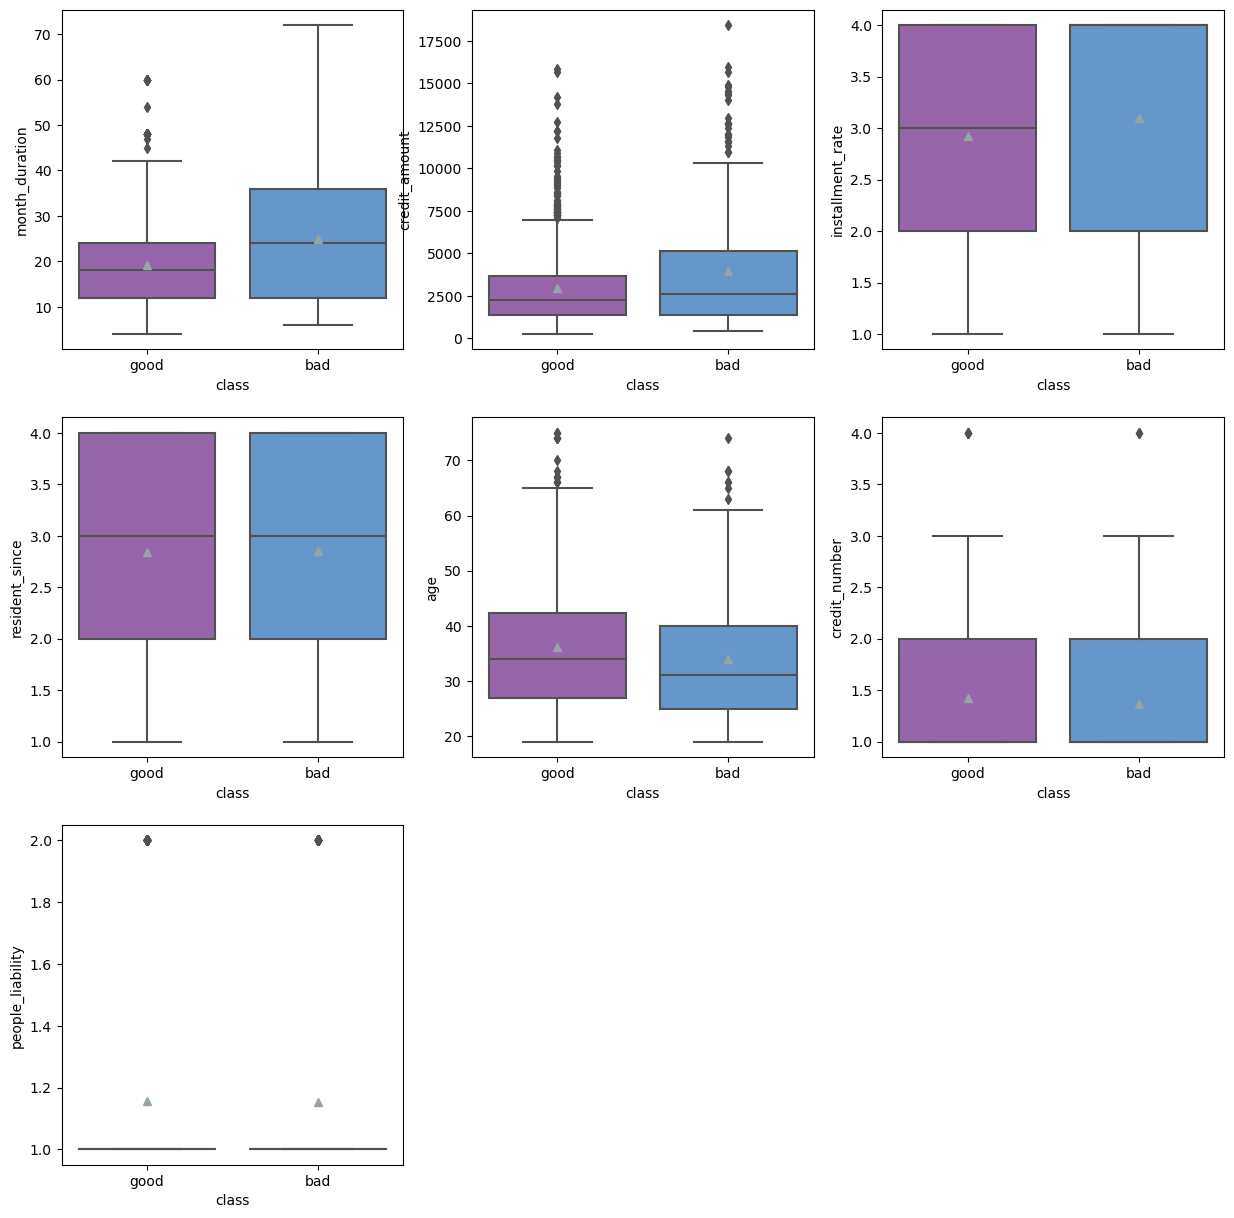

In [55]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

i = 0
j = 0

for category in numerical_attributes:
    sns.boxplot(y=df[category], x=df["class"].replace({1:"good", 2:"bad"}), ax=axs[i, j], orient="v", showmeans=True)
    j += 1
    if j%3 == 0:
        j = 0
        i += 1
        
axs[2, 1].set_visible(True)
fig.delaxes(axs[2, 1])
axs[2, 2].set_visible(True)
fig.delaxes(axs[2, 2])

In [58]:
X = np.array(df_numerical.loc[:, df_numerical.columns != "class"])
print(f"Shape of the features of the dataset: {X.shape}")

y = np.array(df_numerical.loc[:, "class"].replace({1:0, 2:1}))
print(f"Shape of the labels of the dataset: {y.shape}")

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.3, stratify=y)

print(f"Shape of the training set: {X_train.shape}")
print(f"Shape of the test set: {X_test.shape}")

Shape of the features of the dataset: (1000, 48)
Shape of the labels of the dataset: (1000,)
Shape of the training set: (700, 48)
Shape of the test set: (300, 48)


In [59]:
# Standardize data
scaler = StandardScaler()
X_train_raw = X_train
X_test_raw = X_test

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

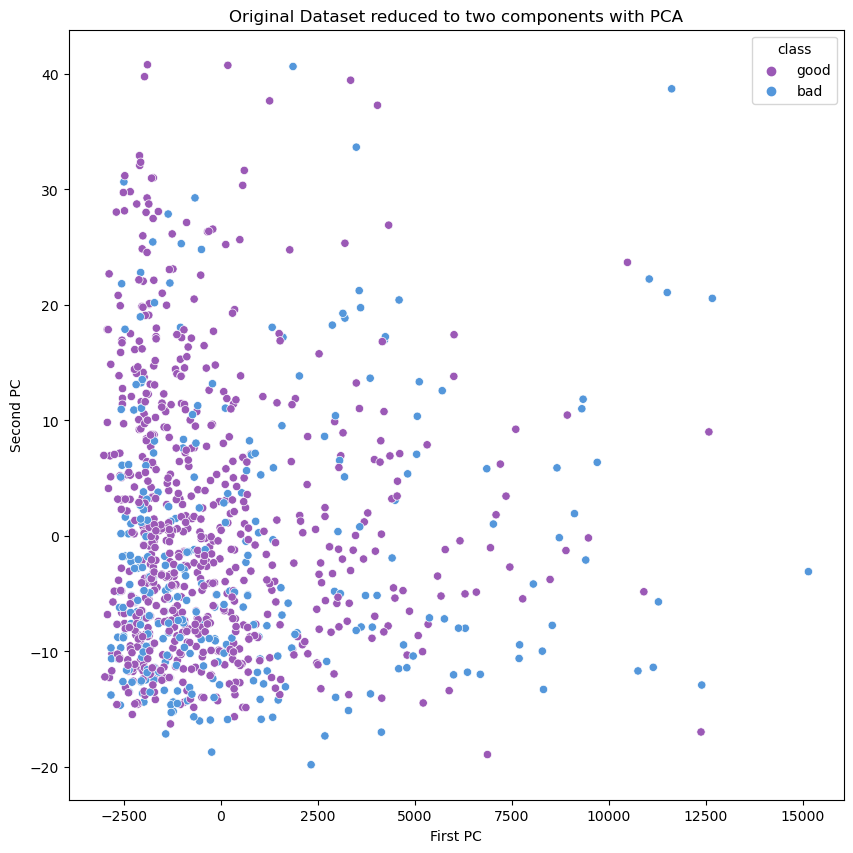

The percentage of variance explained by each components is: [9.99971656e-01 1.64259077e-05]


In [111]:
pca = PCA(n_components=2)

X_pca_visualization = pca.fit_transform(X)

fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x=X_pca_visualization[:, 0], y=X_pca_visualization[:, 1], hue=df["class"].replace({1:"good", 2:"bad"}))
ax.set_title("Original Dataset reduced to two components with PCA")
ax.set_xlabel("First PC")
ax.set_ylabel("Second PC")
plt.show()
print(f"The percentage of variance explained by each components is: {pca.explained_variance_ratio_}")

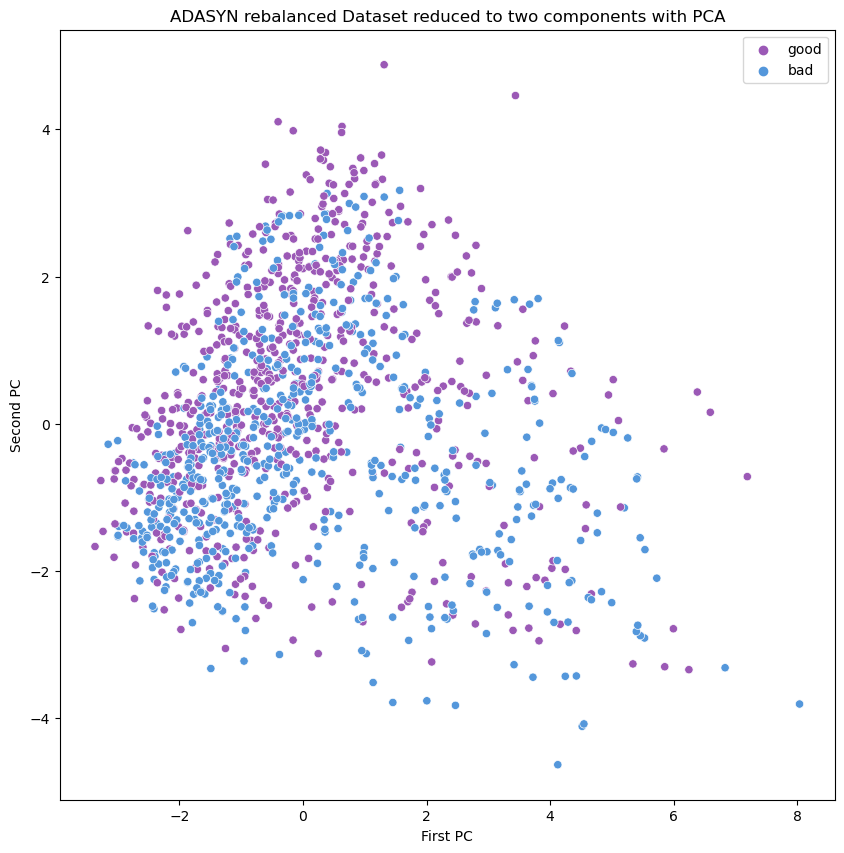

The percentage of variance explained by each component for the ADASYN dataset is: [0.08343458 0.05498741]


In [68]:
# Initialize the ADASYN object
ada = ADASYN(random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the data
X_scaled = scaler.fit_transform(X)

# Apply ADASYN resampling
X_ada, y_ada = ada.fit_resample(X_scaled, y)

# Initialize PCA with 2 components
pca = PCA(n_components=2)

# Fit and transform the resampled data using PCA
X_pca_visualization_ada = pca.fit_transform(X_ada)

# Create the scatter plot
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x=X_pca_visualization_ada[:, 0], y=X_pca_visualization_ada[:, 1], 
                hue=pd.Series(y_ada).replace({0: "good", 1: "bad"}))
ax.set_title("ADASYN rebalanced Dataset reduced to two components with PCA")
ax.set_xlabel("First PC")
ax.set_ylabel("Second PC")
plt.show()

# Print the explained variance ratio
print(f"The percentage of variance explained by each component for the ADASYN dataset is: {pca.explained_variance_ratio_}")


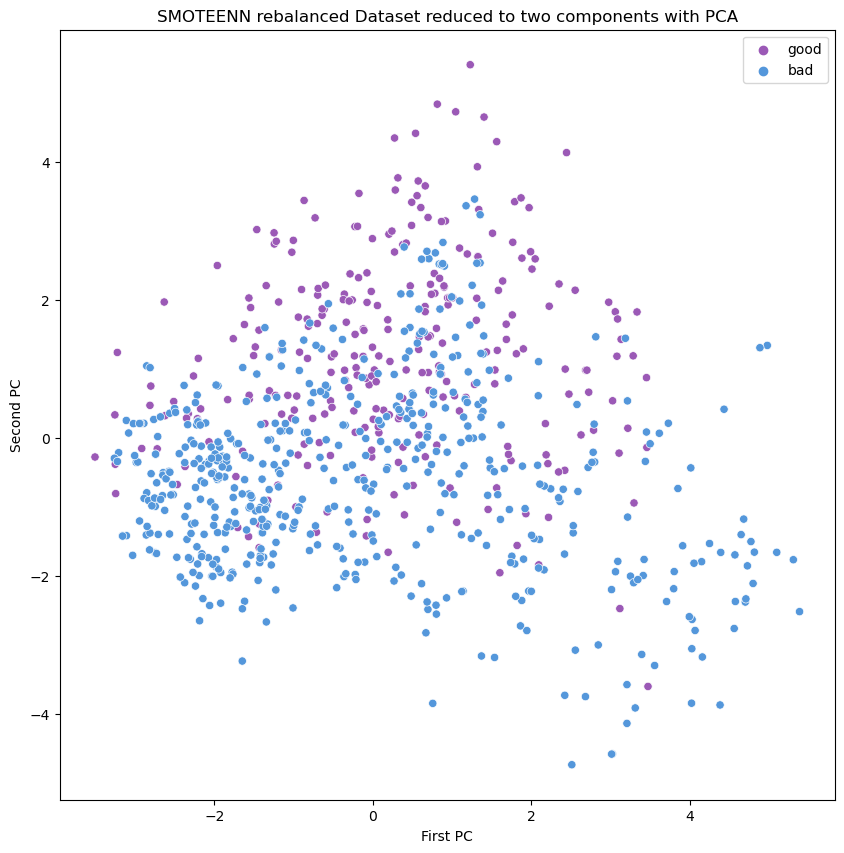

The percentage of variance explained by each components for the SMOTEENN dataset is: [0.08937248 0.06488845]


In [70]:
smoteenn = SMOTEENN(random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the data
X_scaled = scaler.fit_transform(X)

# Apply SMOTEENN resampling
X_smoteenn, y_smoteenn = smoteenn.fit_resample(X_scaled, y)

pca = PCA(n_components=2)
X_smoteenn, y_smoteenn =  smoteenn.fit_resample(scaler.fit_transform(X), y)
X_pca_visualization_smoteenn = pca.fit_transform(X_smoteenn)

fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x=X_pca_visualization_smoteenn[:, 0], y=X_pca_visualization_smoteenn[:, 1], \
                hue=pd.Series(y_smoteenn).replace({0:"good", 1:"bad"}))
ax.set_title("SMOTEENN rebalanced Dataset reduced to two components with PCA")
ax.set_xlabel("First PC")
ax.set_ylabel("Second PC")
plt.show()

print(f"The percentage of variance explained by each components for the SMOTEENN dataset is: {pca.explained_variance_ratio_}")

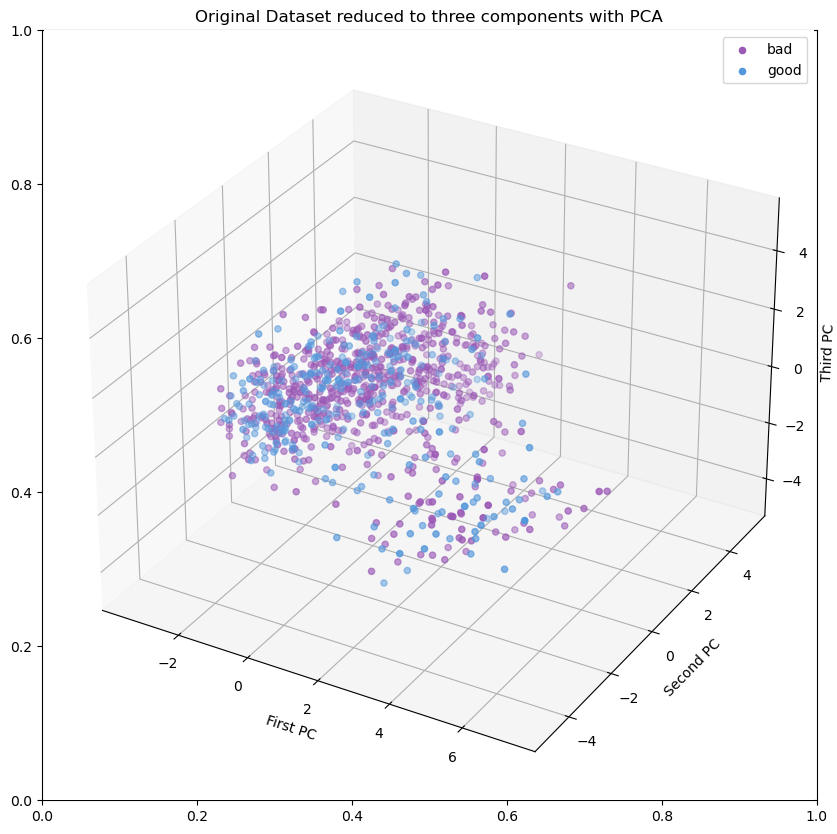

The percentage of variance explained by each components is: [0.07660301 0.05476377 0.0471945 ]


In [109]:
pca = PCA(n_components=3)
X_pca_visualization = pca.fit_transform(scaler.fit_transform(X))

fig, ax = plt.subplots(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_visualization[df["class"] == 1, 0], \
           X_pca_visualization[df["class"] == 1, 1], \
           X_pca_visualization[df["class"] == 1, 2], label="bad")

ax.scatter(X_pca_visualization[df["class"] == 2, 0], \
           X_pca_visualization[df["class"] == 2, 1], \
           X_pca_visualization[df["class"] == 2, 2], label="good")
ax.legend()
ax.set_title("Original Dataset reduced to three components with PCA")
ax.set_xlabel("First PC")
ax.set_ylabel("Second PC")
ax.set_zlabel("Third PC")
plt.show()

print(f"The percentage of variance explained by each components is: {pca.explained_variance_ratio_}")



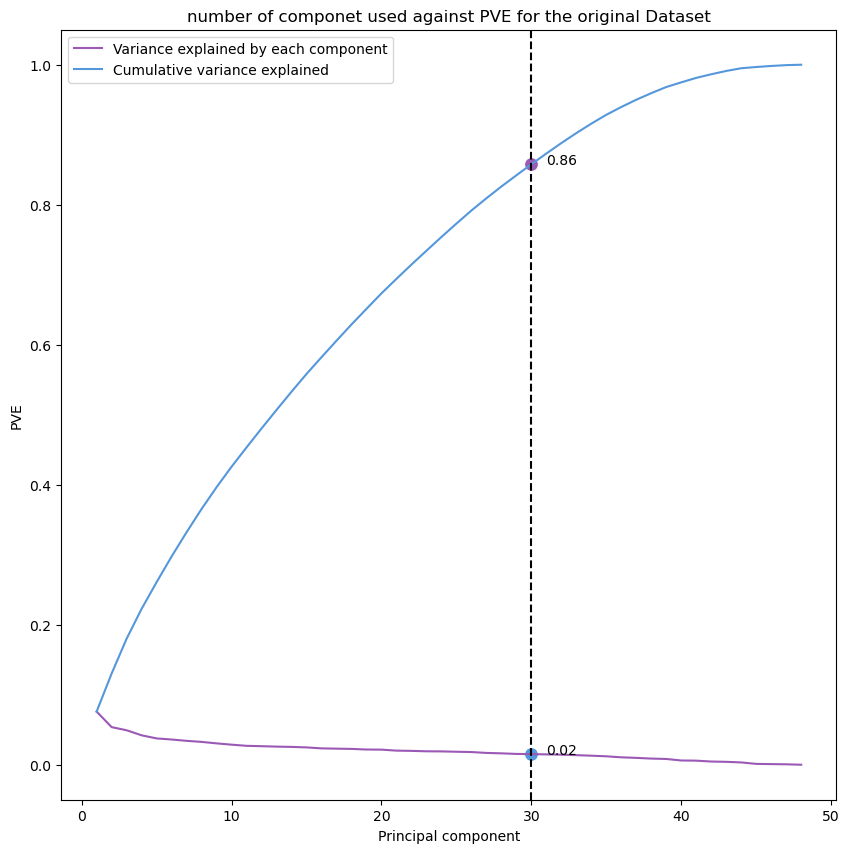

In [74]:
pca = PCA(n_components=X_train.shape[1])
c_analyzed = 30

pca.fit(X_train)
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.lineplot(x=range(1, X_train.shape[1]+1), y=pca.explained_variance_ratio_, label="Variance explained by each component")
ax = sns.lineplot(x=range(1, X_train.shape[1]+1), y=np.cumsum(pca.explained_variance_ratio_), label="Cumulative variance explained")
ax = sns.scatterplot(x=[c_analyzed], y=[np.cumsum(pca.explained_variance_ratio_)[c_analyzed-1]], s=100)
ax.text(c_analyzed+1, np.cumsum(pca.explained_variance_ratio_)[c_analyzed-1], f"{np.cumsum(pca.explained_variance_ratio_)[c_analyzed-1]:.2f}",\
       horizontalalignment='left')

ax = sns.scatterplot(x=[c_analyzed], y=[pca.explained_variance_ratio_[c_analyzed-1]], s=100)
ax.text(c_analyzed+1, pca.explained_variance_ratio_[c_analyzed-1], f"{pca.explained_variance_ratio_[c_analyzed-1]:.2f}",\
       horizontalalignment='left')
plt.axvline(c_analyzed, color="black", ls="--")
ax.set_title("number of componet used against PVE for the original Dataset")
ax.set_xlabel("Principal component")
ax.set_ylabel("PVE")
plt.show()

In [75]:
pca = PCA(c_analyzed)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
Classification 

In [84]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Assuming X and y are your features and target variable respectively
# Example Data (replace with your actual data)
# X = df.drop(columns='target')
# y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the linear SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predict on the testing set
y_pred = svm_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       141
           1       0.69      0.58      0.63        59

    accuracy                           0.80       200
   macro avg       0.76      0.73      0.75       200
weighted avg       0.79      0.80      0.79       200



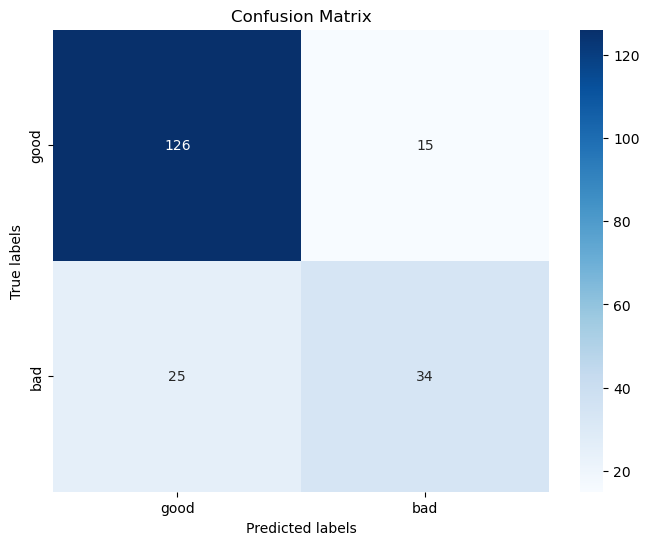

In [87]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train the linear SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predict on the testing set
y_pred = svm_model.predict(X_test_scaled)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["good", "bad"], yticklabels=["good", "bad"])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


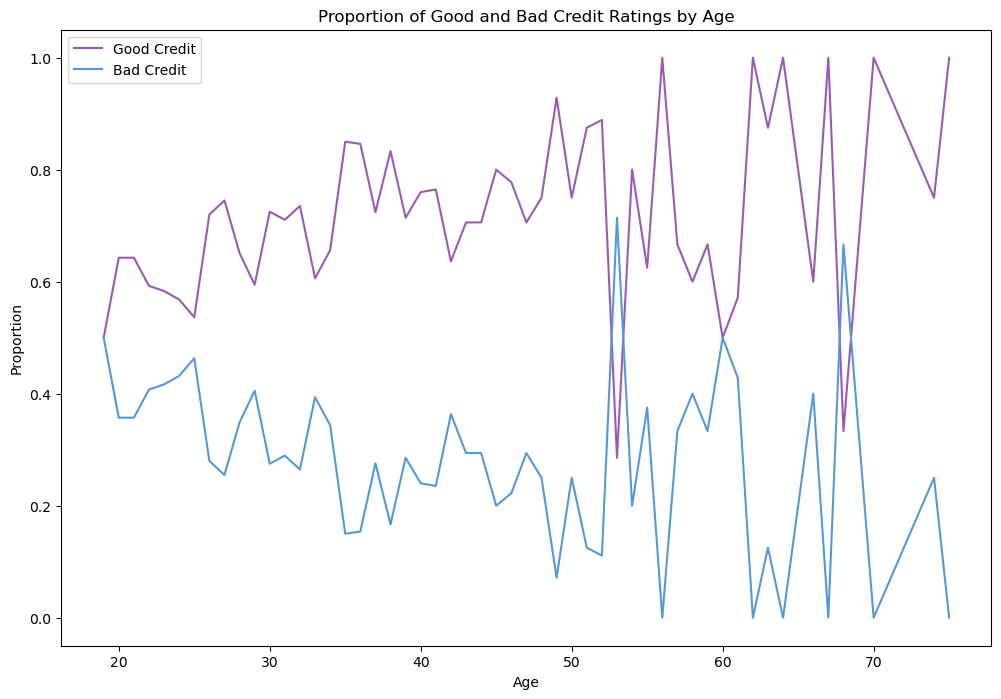

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv("C:\\Users\\soumi\\Downloads\\german_credit_data.csv", sep=",", header=None, names=columns)

# Calculate proportions of good and bad credit ratings for all ages
ageCredit = data.groupby(['age', 'class']).size().unstack(fill_value=0)
ageCredit['total'] = ageCredit.sum(axis=1)
ageCredit['proportion_good'] = ageCredit[1] / ageCredit['total']
ageCredit['proportion_bad'] = ageCredit[2] / ageCredit['total']

# Plot the proportions
plt.figure(figsize=(12, 8))
plt.plot(ageCredit.index, ageCredit['proportion_good'], label='Good Credit')
plt.plot(ageCredit.index, ageCredit['proportion_bad'], label='Bad Credit')
plt.xlabel('Age')
plt.ylabel('Proportion')
plt.title('Proportion of Good and Bad Credit Ratings by Age')
plt.legend()
plt.show()


In [101]:
data = pd.read_csv("C:\\Users\\soumi\\Downloads\\german_credit_data.csv", sep=",", header=None, names=columns)
data.head()

,existing_account,month_duration,credit_history,purpose,credit_amount,saving_bonds,employment_status,installment_rate,status_sex,debts_status,...,property,age,installment_plans,housing_status,credit_number,job,people_liability,telephone,foreign,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


<Axes: xlabel='status_sex', ylabel='count'>

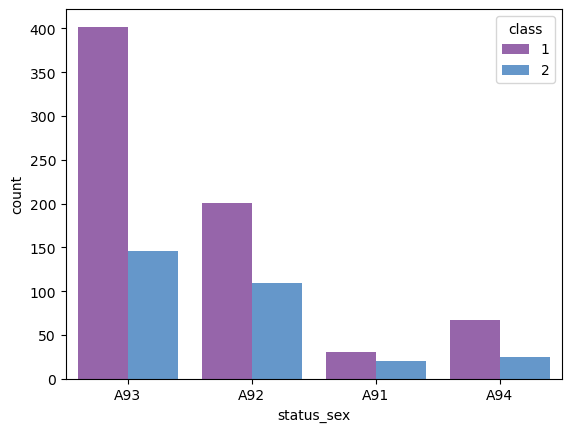

In [99]:
sns.countplot(x= 'status_sex',data = data, hue= 'class')

<Axes: xlabel='job', ylabel='count'>

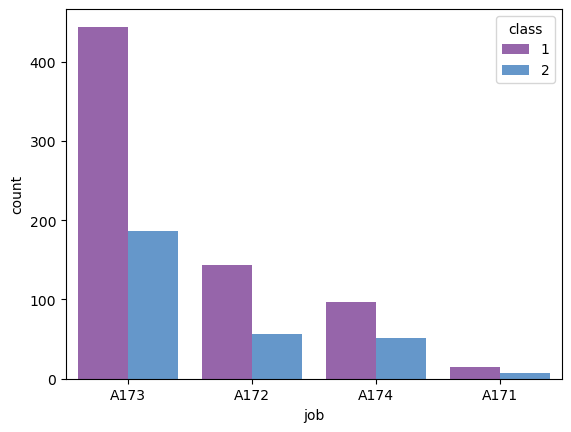

In [100]:
sns.countplot(x= 'job', data= data, hue= 'class')

<Axes: xlabel='existing_account', ylabel='count'>

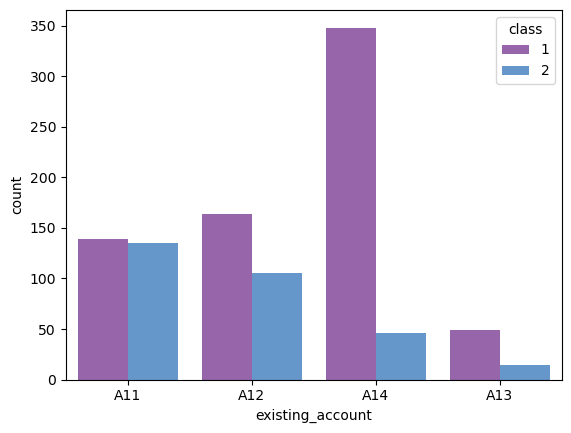

In [103]:
sns.countplot(x= 'existing_account', data= data, hue= 'class')

<Axes: xlabel='credit_history', ylabel='count'>

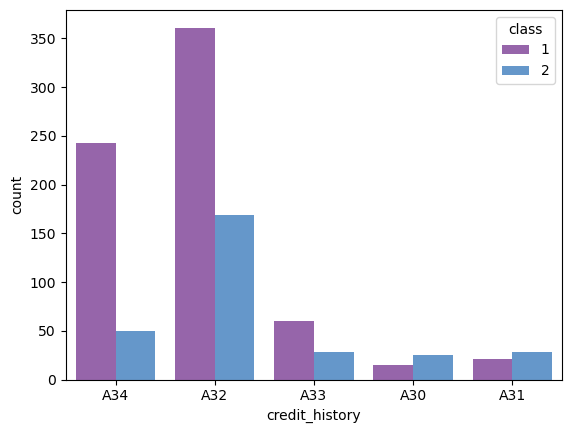

In [104]:
sns.countplot(x= 'credit_history', data= data, hue= 'class')

<Axes: xlabel='employment_status', ylabel='count'>

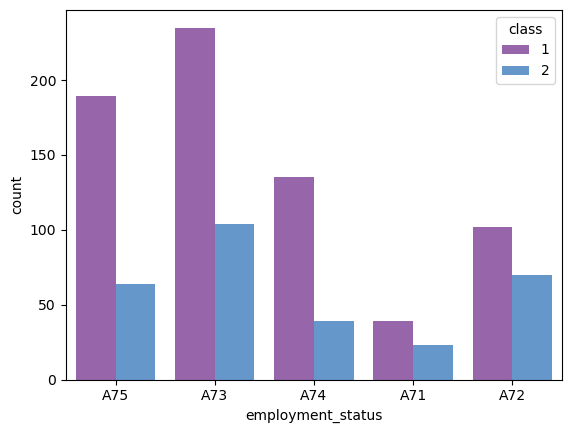

In [105]:
sns.countplot(x= 'employment_status', data= data, hue= 'class')

<Axes: xlabel='property', ylabel='count'>

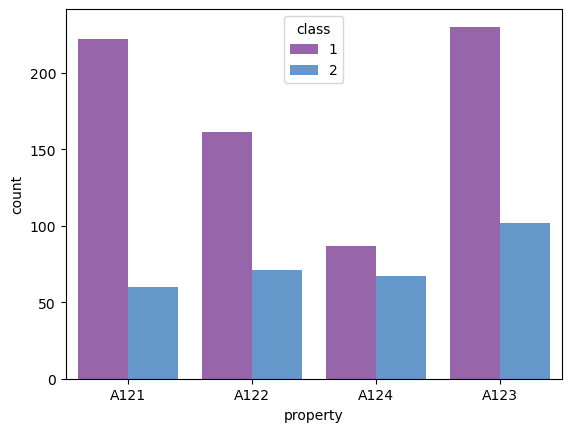

In [106]:
sns.countplot(x= 'property', data= data, hue= 'class')

<Axes: xlabel='age', ylabel='count'>

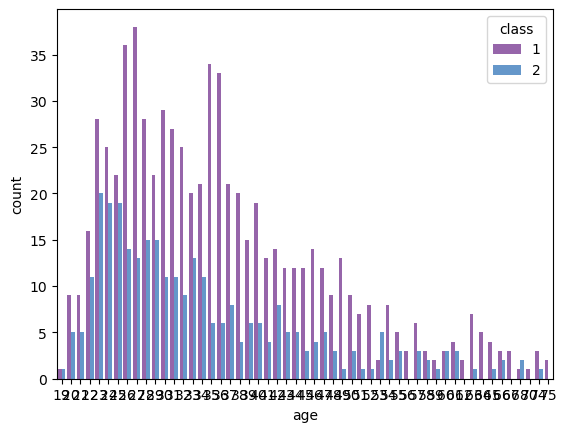

In [107]:
sns.countplot(x= 'age', data= data, hue= 'class')

<Axes: xlabel='foreign', ylabel='count'>

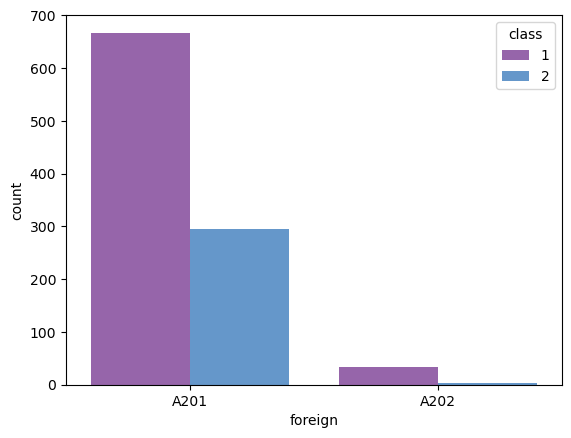

In [108]:
sns.countplot(x= 'foreign', data= data, hue= 'class')